In [3]:
# Import Libraries
import matplotlib 
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.cm as cm
import numpy as np
from copy import deepcopy

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
# Read WCS Values in Sexadecimal (x and y) and Degree (xx and yy)

x = np.loadtxt('x_wcs.txt', dtype='string')
xx = np.loadtxt('x_wcs_deg.txt')
print 'x[0]=',x[0]

y = np.loadtxt('y_wcs.txt', dtype='string')
yy = np.loadtxt('y_wcs_deg.txt')
print 'y[0]=',y[0]

x[0]= 01h37m08.528s
y[0]= +15:43:27.91


In [5]:
# Set the Xaxis Ticks value 

# xxx is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is 01h36m30s with step of 10s until 01h37m
xxx = [(1./24.)*360.+(36./(60.*24.))*360.+(30./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(40./(3600.*24.))*360.,\
       (1./24.)*360.+(36./(60.*24.))*360.+(50./(3600.*24.))*360.,\
       (1./24.)*360.+(37./(60.*24.))*360.+(00./(3600.*24.))*360.]
# xxxx is the Ticks value in String to inclue the h:m:s
xxxx=['36m30s','36m40s','36m50s','1h37m']
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
# xxxxx is the Array Position of the defined xxx Values in the Data WCS 
xxxxx = np.zeros(4)
for i in range(0,4) : 
    xxxxx[i]=np.where(xx == find_nearest(xx,xxx[i]))[0]

In [6]:
# Set the Yaxis Ticks value 

# yyy is Defines with the deg+min/60 for each ticks wanted. 
# In this case it is +15d44m with step of 2m until +15d54m
yyy = [15+(44./(60)),\
       15+(46./(60)),\
       15+(48./(60)),\
       15+(50./(60)),\
       15+(52./(60)),\
       15+(54./(60))]

# yyyy is the Ticks value in String to inclue the $\degree$ symbol
yyyy=['+15$\degree$44','+15$\degree$46','+15$\degree$48','+15$\degree$50','+15$\degree$52','+15$\degree$54']

def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return array[idx]
#yyyyy is the Array Position of the defined yyy Values in the Data WCS 
yyyyy = np.zeros(6)
for i in range(0,6) : 
    yyyyy[i]=np.where(yy == find_nearest(yy,yyy[i]))[0]

In [7]:
# Note for WCS overplot
# from astropy.wcs import WCS
# fits_file = 'NGC628_SN3.merged.tan.fits'
# hdu = fits.open(fits_file)[0]
# wcs = WCS(hdu.header)
            #Not convenient for the Font modification...

In [8]:
# Read Centroid position of the Ha Peak 
regxy = np.loadtxt('Region_xy_centroid.txt')
regx = regxy[0:,0]
regy = regxy[0:,1]

In [9]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_data1 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits')
fhdu_list2.info()
fimage_data2 = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits')
fhdu_list3.info()
fimage_data3 = fhdu_list3[0].data
fhdu_list3.close()
                    

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data3[np.where(aimage_data3 < 0)] = 0
fimage_data2[np.where(aimage_data2 < 0)] = 0
fimage_data3[np.where(aimage_data3 < 0)] = 0
                       
image_data = (((aimage_data2*fimage_data2)+(aimage_data3*fimage_data3))/(1.339*aimage_data1*fimage_data1))
image_data[(aimage_data1 >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
image_data[np.where(aimage_data1 < 1.2e-18)] = 0
image_data[np.where(np.isfinite(image_data) == False)] = 0
image_data[np.where(image_s == 1)] = 0
image_data[np.where(image_data == 0)] = 500

Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits
No.    Name         T

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in multiply
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeW

<IPython.core.display.Javascript object>


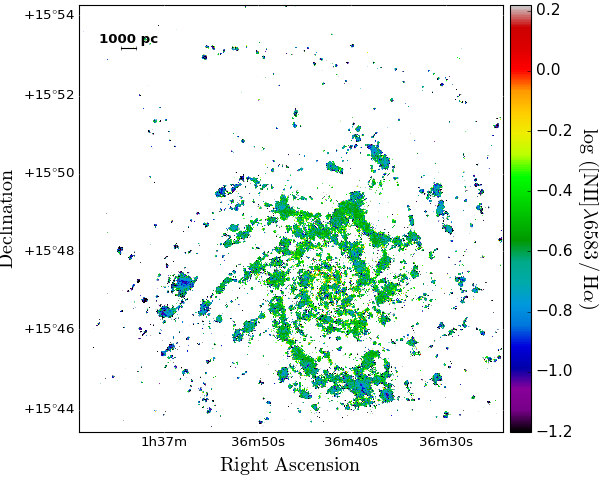

In [10]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[-1.2,-1.0,-0.8,-0.6,-0.4,-0.2,0,0.2],pad=0.01)
cbar.set_label('$\mathrm{log\,\,([NII]\lambda6583\,/\,H}$'+r'$\mathrm{\alpha)}$', rotation=270, fontsize=18, labelpad=25)
cbar.ax.tick_params(labelsize=14)
plt.clim(-1.2,0.22)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810


plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [11]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_NII_Ha.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [12]:
image_data_nh = deepcopy(image_data)

In [13]:
# Read Fits Data and Data Header

ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_data1 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits')
fhdu_list2.info()
fimage_data2 = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits')
fhdu_list3.info()
fimage_data3 = fhdu_list3[0].data
fhdu_list3.close()
                       
#hdu_list = fits.open('NII_Ha_cut.fits')
#hdu_list.info()

#image_data = hdu_list[0].data
#hdu_list.close()
#image_data = np.log10(image_data)
#image_data[np.where(np.isfinite(image_data) == False)] = 0

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data3[np.where(aimage_data3 < 0)] = 0
fimage_data2[np.where(aimage_data2 < 0)] = 0
fimage_data3[np.where(aimage_data3 < 0)] = 0
                       
image_data = (((aimage_data2*fimage_data2)+(aimage_data3*fimage_data3))/(aimage_data1*fimage_data1))
image_data[(aimage_data1 >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = np.log10(image_data)
image_data[np.where(aimage_data1 < 1.2e-18)] = 0
image_data[np.where(np.isfinite(image_data) == False)] = 0
image_data[np.where(image_s == 1)] = 0
image_data[np.where(image_data == 0)] = 500

Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits
No.    Name         T

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:46: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in multiply
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeW

<IPython.core.display.Javascript object>


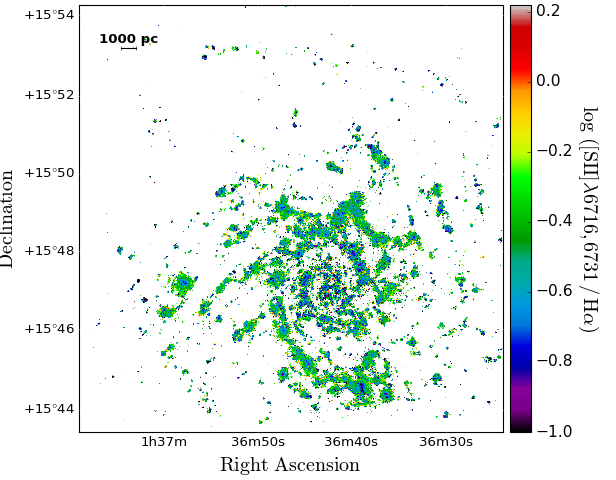

In [14]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scaleààà
cbar=plt.colorbar(ticks=[-1.0,-0.8,-0.6,-0.4,-0.2,0,0.2],pad=0.01)
cbar.set_label('$\mathrm{log\,\,([SII]\lambda6716,6731\,/\,H}$'+r'$\mathrm{\alpha)}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(-1.0,0.22)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [15]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_SII_Ha.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

<IPython.core.display.Javascript object>


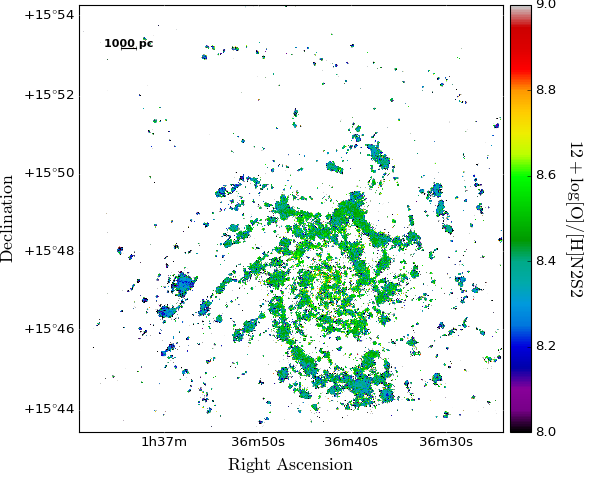

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in power
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in subtract


In [14]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(8.445+0.699*np.log10((10**image_data_nh)*2.87*1.33)-0.253*np.log10((10**image_data)*2.87*1.33)+0.217*np.log10((10**image_data_nh)*2.87)*np.log10((10**image_data)*2.87), cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scaleààà
cbar=plt.colorbar(ticks=[8.0,8.2,8.4,8.6,8.8,9.0,9.2],pad=0.01)
cbar.set_label('$\mathrm{12 + log [O]/[H] N2S2}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(8,9)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.005*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [16]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits')
fhdu_list1.info()
fimage_data1 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits')
fhdu_list2.info()
fimage_data2 = fhdu_list2[0].data
fhdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

ahdu_list4 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits')
ahdu_list4.info()
aimage_data4 = ahdu_list4[0].data
ahdu_list4.close()

fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits')
fhdu_list3.info()
fimage_data3 = fhdu_list3[0].data
fhdu_list3.close()

fhdu_list4 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits')
fhdu_list4.info()
fimage_data4 = fhdu_list4[0].data
fhdu_list4.close()
                       
s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()

aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data3[np.where(aimage_data3 < 0)] = 0
fimage_data2[np.where(aimage_data2 < 0)] = 0
fimage_data3[np.where(aimage_data3 < 0)] = 0
                       
aimage_data2[np.where(aimage_data1 < 0)] = 0
aimage_data3[np.where(aimage_data4 < 0)] = 0
fimage_data2[np.where(aimage_data1 < 0)] = 0
fimage_data3[np.where(aimage_data4 < 0)] = 0

aimage_data1[1800:2064,0:2048] = 0


ahdu_list = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list.info()
aimage_data_H = ahdu_list[0].data
ahdu_list.close()

image_data = 1.3389*(((aimage_data3*fimage_data3)+(aimage_data4*fimage_data4))/((aimage_data2*fimage_data2)+(aimage_data1*fimage_data1)))
image_data = np.log10(image_data)
image_data[(aimage_data_H > 8e-19) & (image_data == 0)] = 0.001
image_data[(aimage_data_H > 8e-19) & (np.isfinite(image_data) == False)] = 0.29
image_data[np.where(aimage_data_H < 1.2e-18)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
#image_data[np.where(image_data == 0)] = 500

Filename: NGC628_SN3_1.0.LineMaps.map.6583.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits
No.    Name     

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:47: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:48: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in less


Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in multiply
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:65: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:66: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:66: RuntimeWarning: invalid value encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:67: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:68: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:69: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


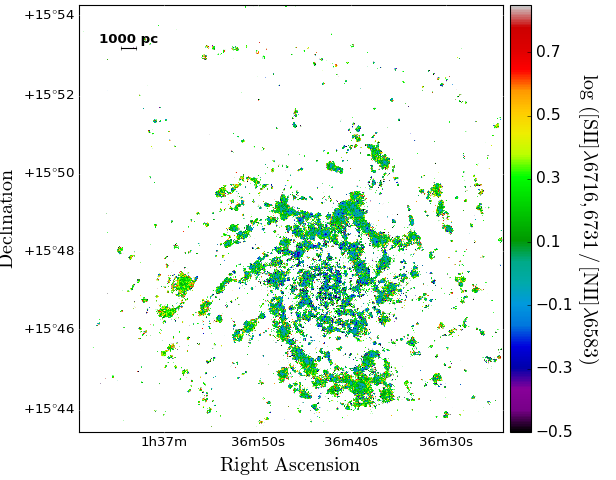

In [17]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[-0.5,-0.3,-0.1,0.1,0.3,0.5,0.7],pad=0.01)
cbar.set_label('$\mathrm{log\,\,([SII]\lambda6716,6731\,/\,[NII]\lambda6583)}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(-0.5,0.85)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [18]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_SII_NII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [19]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

#ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.amplitude.clean.fits')
#ahdu_list3.info()
#aimage_data3 = ahdu_list3[0].data
#ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_data1 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits')
fhdu_list2.info()
fimage_data2 = fhdu_list2[0].data
fhdu_list2.close()

#fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6548.fwhm.clean.fits')
#fhdu_list3.info()
#fimage_data3 = fhdu_list3[0].data
#fhdu_list3.close()
                    

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data1[np.where(aimage_data1 < 0)] = 0
aimage_data2[np.where(aimage_data2 < 0)] = 0
fimage_data1[np.where(fimage_data1 < 0)] = 0
fimage_data2[np.where(fimage_data2 < 0)] = 0
                       
image_data = ((aimage_data1*0.361)/(aimage_data2*0.8))
#image_data[(aimage_data1 >= 1.2e-18) & (image_data == 0)] = 0.001
image_data = 3.1*(2.5/1.07)*np.log10(image_data/2.86)
image_data[np.where(aimage_data2 < 4.5e-19)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[(image_data < -0.2) & (image_data > -499)] = -500

Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


Filename: NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: stars.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in log10
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


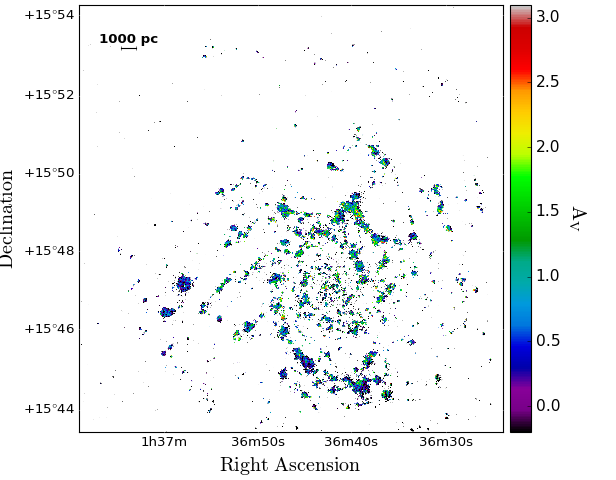

In [36]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[0,0.5,1,1.5,2.0,2.5,3.0,3.5],pad=0.01)
cbar.set_label('$\mathrm{A_V}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(-0.2,3.1)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [37]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_Av.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [20]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.amplitude.clean.int3.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits')
fhdu_list1.info()
fimage_data1 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits')
fhdu_list2.info()
fimage_data2 = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.fwhm.clean.int3.fits')
fhdu_list3.info()
fimage_data3 = fhdu_list3[0].data
fhdu_list3.close()
                    

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data1[np.where(aimage_data1 < 0)] = 0
aimage_data2[np.where(aimage_data2 < 0)] = 0
fimage_data1[np.where(fimage_data1 < 0)] = 0
fimage_data2[np.where(fimage_data2 < 0)] = 0
aimage_data3[np.where(aimage_data3 < 0)] = 0
fimage_data3[np.where(fimage_data3 < 0)] = 0
                       
image_data = ((1.333*(aimage_data1*fimage_data1))/(aimage_data2*fimage_data2))
image_data[(aimage_data2 >= 4e-19) & (image_data == 0)] = 0.01
image_data = np.log10(image_data)
image_data[(aimage_data2 < 3.6e-19) & (aimage_data1 < 3.6e-19)] = 500
image_data[(aimage_data2+aimage_data1 < 5e-19)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 500
image_data[np.where(image_s == 1)] = 500
image_data[(image_data > 0.95) & (image_data < 499)] = 0.95

#image_data[np.where(image_data < -3)] = 500


#hdu_list = fits.open('OIII_Hb_cut.fits')
#hdu_list.info()
#image_data = hdu_list[0].data
#hdu_list.close()
#image_data = np.log10(image_data)


Filename: NGC628_SN2_1.0.LineMaps.map.5007.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.amplitude.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.5007.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.fwhm.clean.int3.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.fwhm.clean.i

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:41: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: invalid value encountered in multiply
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:44: RuntimeWarning: i

<IPython.core.display.Javascript object>


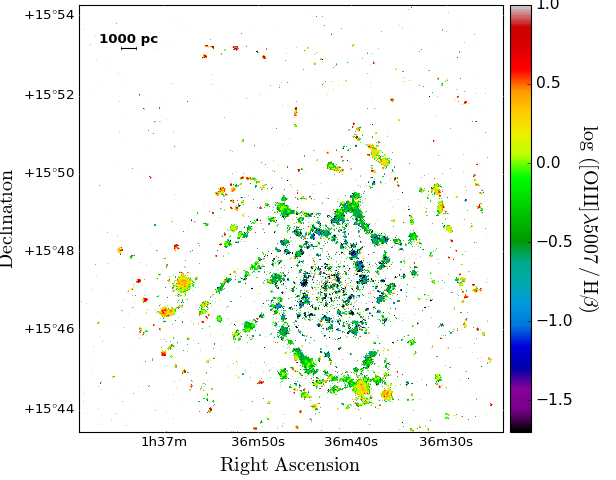

In [21]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[-1.5,-1.0,-0.5,0,0.5,1],pad=0.01)
cbar.set_label('$\mathrm{log\,\,([OIII]\lambda5007\,/\,H}$'+r'$\mathrm{\beta)}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(-1.7,1.0)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [22]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_OIII_Hb.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [23]:
# Read Fits Data and Data Header
ahdu_list = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.velocity.clean.shift.fits')
ahdu_list.info()
image_data = ahdu_list[0].data
ahdu_list.close()

ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
image_data[(image_data > 695)] = 695
image_data[(image_data < 630)] = 630
image_data[np.where(aimage_data1 < 1.2e-18)] = 10000
image_data[(image_s == 1)] = 10000


Filename: NGC628_SN3_1.0.LineMaps.map.6563.velocity.clean.shift.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      43   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: stars.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


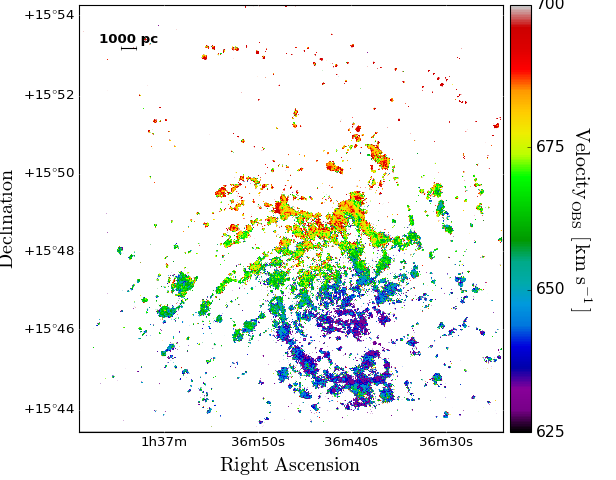

In [46]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[625,650,675,700],pad=0.01)
cbar.set_label('$\mathrm{Velocity_{OBS}\,\,[\,km\,\,s^{-1}\,]}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(625,700)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [47]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_velocity.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [24]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.flux.extcor.clean.int33.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

ahdu_list4 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits')
ahdu_list4.info()
aimage_data4 = ahdu_list4[0].data
ahdu_list4.close()

ahdu_list5 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list5.info()
aimage_data5 = ahdu_list5[0].data
ahdu_list5.close()

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data1[np.where(aimage_data1 < 0)] = 0
aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data3[np.where(aimage_data3 < 0)] = 0
aimage_data4[np.where(aimage_data4 < 0)] = 0
r = fits.getdata('NGC628_SITELLE_rayon_pc_carte.fits')

image_data = (aimage_data1 + (aimage_data2+aimage_data3)/1.33)/aimage_data4
image_data[(aimage_data4 <= 6.5e-18) & (aimage_data3 <= 6.5e-18) & (aimage_data1 <= 1e-17)] = 10000
image_data[(aimage_data5 <= 2.4e-18) & (r <= 3000) & (r >= 0)] = 10000
image_data[(aimage_data5 <= 2.1e-18) & (r <= 4000) & (r >= 3000)] = 10000
image_data[(aimage_data5 <= 1.9e-18) & (r <= 6000) & (r >= 4000)] = 10000
image_data[(aimage_data5 <= 1.6e-18) & (r <= 8000) & (r >= 6000)] = 10000
image_data[(aimage_data5 <= 1.2e-18) & (r >= 8000)] = 10000
image_data = np.log10(image_data)
#image_data[(aimage_data2 < 3.6e-19) & (aimage_data1 < 3.6e-19)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 10000
#image_data[np.where(image_s == 1)] = 500
#image_data[(image_data > 0.95) & (image_data < 499)] = 0.95

#image_data[np.where(image_data < -3)] = 500


#hdu_list = fits.open('OIII_Hb_cut.fits')
#hdu_list.info()
#image_data = hdu_list[0].data
#hdu_list.close()
#image_data = np.log10(image_data)


Filename: NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: stars.fits
No.    Name      

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: Runtime

<IPython.core.display.Javascript object>


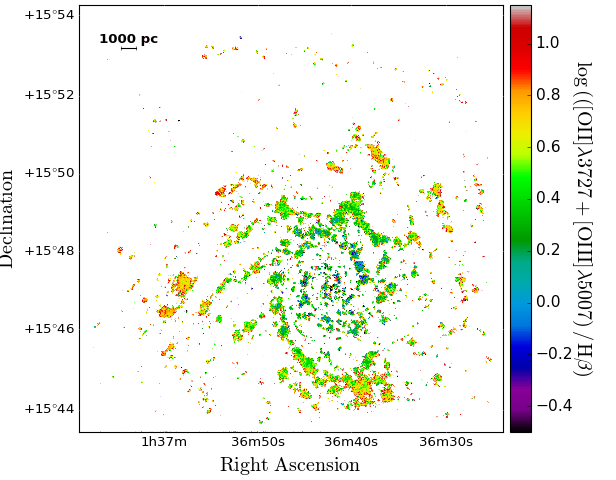

In [26]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0],pad=0.01)
cbar.set_label('$\mathrm{log\,(([OII]\lambda3727+[OIII]\lambda5007)\,/\,H}$'+r'$\mathrm{\beta)}$', rotation=270, fontsize=18, labelpad=20)
plt.clim(-0.5, 1.15)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [27]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_OII+OIII_Hb.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [28]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.flux.extcor.clean.int33.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

ahdu_list4 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits')
ahdu_list4.info()
aimage_data4 = ahdu_list4[0].data
ahdu_list4.close()

ahdu_list5 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list5.info()
aimage_data5 = ahdu_list5[0].data
ahdu_list5.close()

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data1[np.where(aimage_data1 < 0)] = 0
aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data3[np.where(aimage_data3 < 0)] = 0
aimage_data4[np.where(aimage_data4 < 0)] = 0
r = fits.getdata('NGC628_SITELLE_rayon_pc_carte.fits')

image_data = (aimage_data1/aimage_data4)
image_data[(aimage_data4 <= 6.5e-18) & (aimage_data1 <= 1e-17)] = 10000
image_data[(aimage_data5 <= 2.4e-18) & (r <= 3000) & (r >= 0)] = 10000
image_data[(aimage_data5 <= 2.1e-18) & (r <= 4000) & (r >= 3000)] = 10000
image_data[(aimage_data5 <= 1.9e-18) & (r <= 6000) & (r >= 4000)] = 10000
image_data[(aimage_data5 <= 1.6e-18) & (r <= 8000) & (r >= 6000)] = 10000
image_data[(aimage_data5 <= 1.2e-18) & (r >= 8000)] = 10000
image_data[np.where(image_s == 1)] = 10000
image_data = np.log10(image_data)
#image_data[(aimage_data2 < 3.6e-19) & (aimage_data1 < 3.6e-19)] = 500
image_data[np.where(np.isfinite(image_data) == False)] = 10000
#image_data[(image_data > 0.95) & (image_data < 499)] = 0.95

#image_data[np.where(image_data < -3)] = 500


#hdu_list = fits.open('OIII_Hb_cut.fits')
#hdu_list.info()
#image_data = hdu_list[0].data
#hdu_list.close()
#image_data = np.log10(image_data)


Filename: NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: stars.fits
No.    Name      

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in less_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: Runtime

<IPython.core.display.Javascript object>


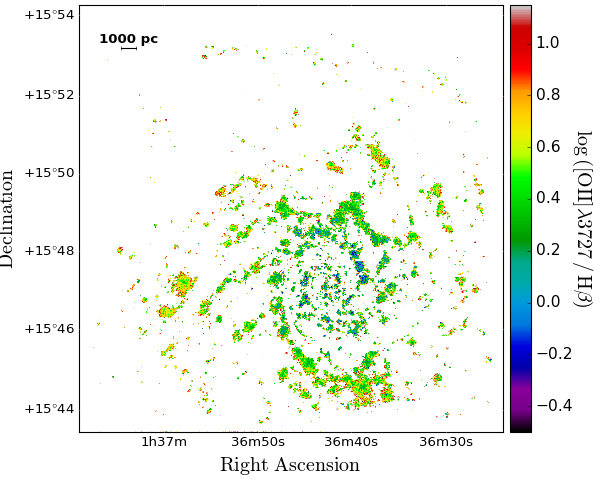

In [29]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[-0.4,-0.2,0,0.2,0.4,0.6,0.8,1.0],pad=0.01)
cbar.set_label('$\mathrm{log\,([OII]\lambda3727\,/\,H}$'+r'$\mathrm{\beta)}$', rotation=270, fontsize=18, labelpad=20)
plt.clim(-0.5, 1.15)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [30]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_OII_Hb.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [31]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN2_1.0.LineMaps.map.4959.flux.extcor.clean.int33.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

ahdu_list4 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits')
ahdu_list4.info()
aimage_data4 = ahdu_list4[0].data
ahdu_list4.close()

ahdu_list5 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list5.info()
aimage_data5 = ahdu_list5[0].data
ahdu_list5.close()

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data1[np.where(aimage_data1 < 0)] = 0
aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data3[np.where(aimage_data3 < 0)] = 0
aimage_data4[np.where(aimage_data4 < 0)] = 0
r = fits.getdata('NGC628_SITELLE_rayon_pc_carte.fits')

image_data = (aimage_data2+aimage_data3)/(1.33*aimage_data1)
image_data[((aimage_data2+aimage_data3 > 0) & (aimage_data1 == 0))] = 10
image_data[((aimage_data2+aimage_data3 == 0) & (aimage_data1 > 0))] = 0.001
image_data[((aimage_data3 <= 6.5e-18) & (aimage_data1 <= 0.2e-17))] = 10000
image_data[(aimage_data5 <= 2.4e-18) & (r <= 3000) & (r >= 0)] = 10000
image_data[(aimage_data5 <= 2.1e-18) & (r <= 4000) & (r >= 3000)] = 10000
image_data[(aimage_data5 <= 1.9e-18) & (r <= 6000) & (r >= 4000)] = 10000
image_data[(aimage_data5 <= 1.6e-18) & (r <= 8000) & (r >= 6000)] = 10000
image_data[(aimage_data5 <= 1.2e-18) & (r >= 8000)] = 10000
image_data = np.log10(image_data)
image_data[np.where(np.isfinite(image_data) == False)] = 4
#image_data[(aimage_data2 < 3.6e-19) & (aimage_data1 < 3.6e-19)] = 500
image_data[np.where(image_s == 1)] = 4
#image_data[(image_data > 0.95) & (image_data < 499)] = 0.95

#image_data[np.where(image_data < -3)] = 500


#hdu_list = fits.open('OIII_Hb_cut.fits')
#hdu_list.info()
#image_data = hdu_list[0].data
#hdu_list.close()
#image_data = np.log10(image_data)


Filename: NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.4959.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: stars.fits
No.    Name      

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:37: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarnin

<IPython.core.display.Javascript object>


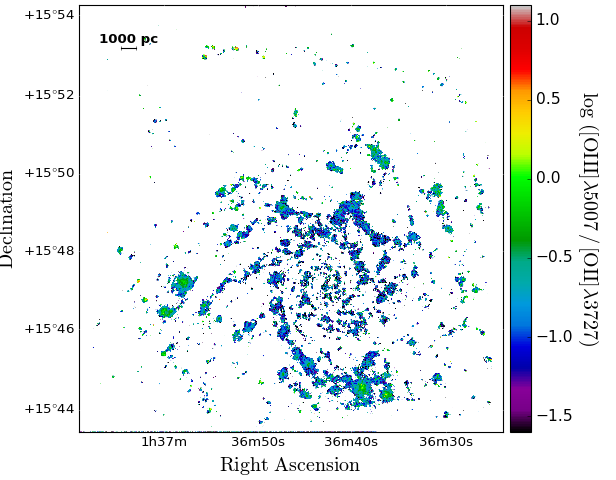

In [32]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[-1.5,-1.0,-0.5,0,0.5,1.0],pad=0.01)
cbar.set_label('$\mathrm{log\,\,([OIII]\lambda5007\,/\,[OII]\lambda3727)}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(-1.6, 1.1)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [33]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_OIII_OII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [34]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.flux.extcor.clean.int33.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list5 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list5.info()
aimage_data5 = ahdu_list5[0].data
ahdu_list5.close()

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data1[np.where(aimage_data1 < 0)] = 0
aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data5[np.where(aimage_data5 < 0)] = 0
r = fits.getdata('NGC628_SITELLE_rayon_pc_carte.fits')

image_data = (aimage_data1)/(aimage_data2)
image_data[((aimage_data2 > 0) & (aimage_data1 == 0))] = 0.1
image_data[((aimage_data2 == 0) & (aimage_data1 > 0))] = 32
image_data[((aimage_data2 <= 6.5e-18) & (aimage_data1 <= 0.2e-17))] = 10000
image_data[(aimage_data5 <= 2.4e-18) & (r <= 3000) & (r >= 0)] = 10000
image_data[(aimage_data5 <= 2.1e-18) & (r <= 4000) & (r >= 3000)] = 10000
image_data[(aimage_data5 <= 1.9e-18) & (r <= 6000) & (r >= 4000)] = 10000
image_data[(aimage_data5 <= 1.6e-18) & (r <= 8000) & (r >= 6000)] = 10000
image_data[(aimage_data5 <= 1.2e-18) & (r >= 8000)] = 10000
image_data = np.log10(image_data)
image_data[np.where(np.isfinite(image_data) == False)] = 4
#image_data[(aimage_data2 < 3.6e-19) & (aimage_data1 < 3.6e-19)] = 500
image_data[np.where(image_s == 1)] = 4
image_data[((image_data > 1.55) & (image_data < 4))] = 1.55
#image_data[(image_data > 0.95) & (image_data < 499)] = 0.95
image_data[(aimage_data5 <= 2.5e-18) & (image_data == 1.55)] = 4
#image_data[np.where(image_data < -3)] = 500


#hdu_list = fits.open('OIII_Hb_cut.fits')
#hdu_list.info()
#image_data = hdu_list[0].data
#hdu_list.close()
#image_data = np.log10(image_data)


Filename: NGC628_SN1_1.0.LineMaps.map.3727.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: stars.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in less_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:30: Runtime

<IPython.core.display.Javascript object>


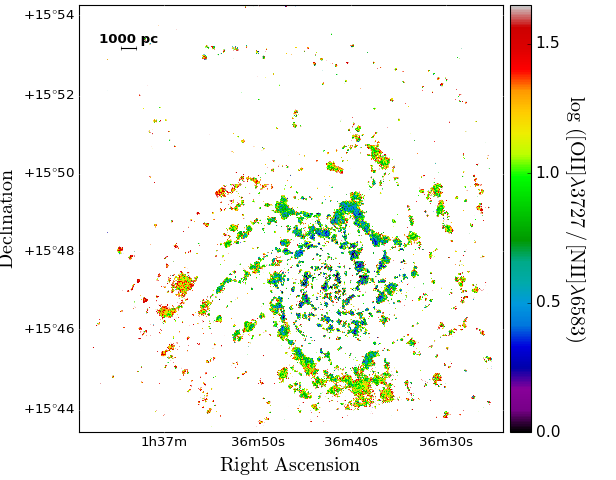

In [35]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[0,0.5,1.0,1.5],pad=0.01)
cbar.set_label('$\mathrm{log\,\,([OII]\lambda3727\,/\,[NII]\lambda6583)}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(0, 1.65)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2)
plt.yticks(yyyyy2,yyyy2)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [36]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_OII_NII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [37]:
# Read Fits Data and Data Header
ahdu_list1 = fits.open('NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6583.flux.extcor.clean.int33.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list5 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list5.info()
aimage_data5 = ahdu_list5[0].data
ahdu_list5.close()

ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.flux.extcor.clean.int33.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

ahdu_list4 = fits.open('NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits')
ahdu_list4.info()
aimage_data4 = ahdu_list4[0].data
ahdu_list4.close()

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data1[np.where(aimage_data1 < 0)] = 0
aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data5[np.where(aimage_data5 < 0)] = 0
r = fits.getdata('NGC628_SITELLE_rayon_pc_carte.fits')

#aimage_data2[(aimage_data2 <= 0.2e-18)] = 0
#aimage_data1[(aimage_data1 <= 1e-19)] = 0
image_data = (aimage_data1/aimage_data4)/((aimage_data2/aimage_data3)*2.87)
image_data[((aimage_data2 > 0) & (aimage_data1 == 0))] = 0.005
image_data[((aimage_data2 == 0) & (aimage_data1 > 0))] = 1000
#image_data[((aimage_data2 <= 6.5e-18) & (aimage_data1 <= 0.2e-17))] = 100000
image_data[(aimage_data5 <= 2.4e-18) & (r <= 3000) & (r >= 0)] = 100000
image_data[(aimage_data5 <= 2.1e-18) & (r <= 4000) & (r >= 3000)] = 100000
image_data[(aimage_data5 <= 1.9e-18) & (r <= 6000) & (r >= 4000)] = 100000
image_data[(aimage_data5 <= 1.6e-18) & (r <= 8000) & (r >= 6000)] = 100000
image_data[(aimage_data5 <= 1.2e-18) & (r >= 8000)] = 100000
image_data = np.log10(image_data)
image_data[np.where(np.isfinite(image_data) == False)] = 5
#image_data[(aimage_data2 < 3.6e-19) & (aimage_data1 < 3.6e-19)] = 500
image_data[np.where(image_s == 1)] = 5
image_data[((image_data > 2) & (image_data < 2.9))] = 2
#image_data[(image_data > 0.95) & (image_data < 499)] = 0.95
image_data[(aimage_data5 <= 1.2e-18)] = 5
image_data[np.where(image_data > 2.9)] = 5

#fits.writeto('NGC628_ratio_OIII_NII_carte.fits', image_data)

#hdu_list = fits.open('OIII_Hb_cut.fits')
#hdu_list.info()
#image_data = hdu_list[0].data
#hdu_list.close()
#image_data = np.log10(image_data)


Filename: NGC628_SN2_1.0.LineMaps.map.5007.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6583.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float64   
Filename: NGC628_SN2_1.0.LineMaps.map.4861.flux.extcor.clean.int33.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float64   
Filename: stars.fits
No.    Name      

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:38: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: RuntimeWarning: invalid value encountered in greater
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: invalid value encountered in less_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:43: Runtime

<IPython.core.display.Javascript object>


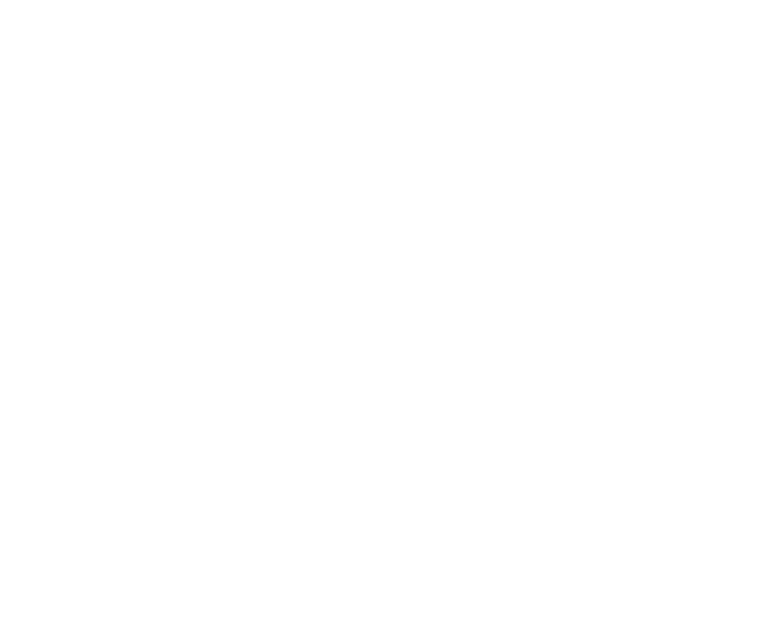

ImportError: No module named plt.lines.Line2D

In [43]:
# Plot the Data 
%matplotlib nbagg

# Set the number of subplots
#nb_row = 3
#nb_col = 2
nb_row = 2
nb_col = 2
elem = [[str('') for i_test in range(0,nb_col)]\
                 for j_test in range(0,nb_row)]

# Creation of the frame with subplots
f, axarr = plt.subplots(nb_row, nb_col, figsize=(9.7,7.92))
f.subplots_adjust(hspace=0.04)
f.subplots_adjust(wspace=0.15)


# Choose X and Y labels

common_x = '$\mathrm{Right\,\,Ascension}$'
common_y = '$\mathrm{Declination}$'
matplotlib.rcParams.update({'font.size': 16.0})
    # and Position
f.text(0.46, 0.02, common_x, ha='center',size=16.0)
f.text(0.02, 0.53, common_y, va='center', rotation='vertical',size=16)

# Plot the Images
colorbarlim=[-1.5,2.2]
a1 = axarr[0][0].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
a2 = axarr[0][1].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
a3 = axarr[1][0].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
a4 = axarr[1][1].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)

# Plot the Color Scale

cbar_ax = f.add_axes([0.85,0.074,0.02,0.911])
cbar_obj = f.colorbar(a1, cax = cbar_ax)
cbar_obj.set_label('$\mathrm{log\,\,([OIII]\lambda5007\,/\,[NII]\lambda6583)}$', rotation=270, fontsize=18, labelpad=20)
cbar_obj.set_ticks([-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0])
cbar_obj.ax.tick_params(labelsize=10)  

#1
xlow1 = 362
xmax1 = 590
ylow1 = 550
ymax1 = 785

#2
xlow2 = 862
xmax2 = 1090
ylow2 = 840
ymax2 = 1075

#3
xlow3 = 1122
xmax3 = 1350
ylow3 = 865
ymax3 = 1100

#4
xlow4 = 1182
xmax4 = 1410
ylow4 = 574
ymax4 = 810


# Plot the Predefined Ticks


xxxxx21=[X for X in list(xxxxx) if (X >= xlow1 and X <= xmax1)]
xxxxx22=[X for X in list(xxxxx) if (X >= xlow2 and X <= xmax2)]
xxxxx23=[X for X in list(xxxxx) if (X >= xlow3 and X <= xmax3)]
xxxxx24=[X for X in list(xxxxx) if (X >= xlow4 and X <= xmax4)]
xxxx21 = []
xxxx22 = []
xxxx23 = []
xxxx24 = []
for i in range(0,len(xxxxx21)):
    xxxx21.append(xxxx[np.where(xxxxx == np.array(xxxxx21[i]))[0][0]])
for i in range(0,len(xxxxx22)):
    xxxx22.append(xxxx[np.where(xxxxx == np.array(xxxxx22[i]))[0][0]])
for i in range(0,len(xxxxx23)):
    xxxx23.append(xxxx[np.where(xxxxx == np.array(xxxxx23[i]))[0][0]])
for i in range(0,len(xxxxx24)):
    xxxx24.append(xxxx[np.where(xxxxx == np.array(xxxxx24[i]))[0][0]])
    
yyyyy21=[Y for Y in list(yyyyy) if (Y >= ylow1 and Y <= ymax1)]
yyyyy22=[Y for Y in list(yyyyy) if (Y >= ylow2 and Y <= ymax2)]
yyyyy23=[Y for Y in list(yyyyy) if (Y >= ylow3 and Y <= ymax3)]
yyyyy24=[Y for Y in list(yyyyy) if (Y >= ylow4 and Y <= ymax4)]
yyyy21 = []
yyyy22 = []
yyyy23 = []
yyyy24 = []
for i in range(0,len(yyyyy21)):
    yyyy21.append(yyyy[np.where(yyyyy == np.array(yyyyy21[i]))[0][0]])
for i in range(0,len(yyyyy22)):
    yyyy22.append(yyyy[np.where(yyyyy == np.array(yyyyy22[i]))[0][0]])
for i in range(0,len(yyyyy23)):
    yyyy23.append(yyyy[np.where(yyyyy == np.array(yyyyy23[i]))[0][0]])
for i in range(0,len(yyyyy24)):
    yyyy24.append(yyyy[np.where(yyyyy == np.array(yyyyy24[i]))[0][0]])
    
    

a1.cmap.set_over('w')
a2.cmap.set_over('w')
a3.cmap.set_over('w')
a4.cmap.set_over('w')
a1.cmap.set_under('k')
a2.cmap.set_under('k')
a3.cmap.set_under('k')
a4.cmap.set_under('k')


# Plot the Images

a1 = axarr[0][0].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
axarr[0][0].set_xlim(xlow1,xmax1)
axarr[0][0].set_ylim(ylow1,ymax1)
a2 = axarr[0][1].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
axarr[0][1].set_xlim(xlow2,xmax2)
axarr[0][1].set_ylim(ylow2,ymax2)
a3 = axarr[1][0].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
axarr[1][0].set_xlim(xlow3,xmax3)
axarr[1][0].set_ylim(ylow3,ymax3)
a4 = axarr[1][1].imshow(image_data, cmap='nipy_spectral', clim=colorbarlim)
axarr[1][1].set_xlim(xlow4,xmax4)
axarr[1][1].set_ylim(ylow4,ymax4)

    

# Plot the Predefined Ticks

axarr[0][0].set_xticks(xxxxx21)
axarr[0][0].set_xticklabels(xxxx21, fontsize=8, fontname='Helvetica')
axarr[0][1].set_xticks(xxxxx22)
axarr[0][1].set_xticklabels(xxxx22, fontsize=8, fontname='Helvetica')
axarr[1][0].set_xticks(xxxxx23)
axarr[1][0].set_xticklabels(xxxx23, fontsize=8, fontname='Helvetica')
axarr[1][1].set_xticks(xxxxx24)
axarr[1][1].set_xticklabels(xxxx24, fontsize=8, fontname='Helvetica')

axarr[0][0].set_yticks(yyyyy21)
axarr[0][0].set_yticklabels(yyyy21, fontsize=8, fontname='Helvetica')
axarr[0][1].set_yticks(yyyyy22)
axarr[0][1].set_yticklabels(yyyy22, fontsize=8, fontname='Helvetica')
axarr[1][0].set_yticks(yyyyy23)
axarr[1][0].set_yticklabels(yyyy23, fontsize=8, fontname='Helvetica')
axarr[1][1].set_yticks(yyyyy24)
axarr[1][1].set_yticklabels(yyyy24, fontsize=8, fontname='Helvetica')


# Plot the Ha Peaks Positions 
axarr[0][0].plot(regx, regy, '+k', markersize=5)
axarr[0][1].plot(regx, regy, '+k', markersize=5)
axarr[1][0].plot(regx, regy, '+k', markersize=5)
axarr[1][1].plot(regx, regy, '+k', markersize=5)

# Define the Scale of that_amount_of_pc Line Position
#that_amount_of_pc = 1000
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow1 + (xmax1-xlow1) * 0.1
xlinemax = xlow1 + (xmax1-xlow1) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow1 + (ymax1-ylow1) * 0.85
ylinemax = ylow1 + (ymax1-ylow1) * 0.85

import plt.lines.Line2D as Line2D
# Plot the Scale of that_amount_of_pc Line Position
axarr[0][0].add_line(Line2D([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker='|', markersize=3))
axarr[0][0].annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 8, fontname = 'Times', color = 'k',fontweight='bold')




# Modification of the Plot area and the Axis Labels
f.subplots_adjust(top=0.99)
f.subplots_adjust(bottom=0.069)
f.subplots_adjust(left=0.09)
f.subplots_adjust(right=0.84)

# Add white contour on each images
for i in range(0,2):
    for j in range(0,2):
        for z in ['bottom', 'top', 'left', 'right']:
            axarr[i][j].spines[z].set_color('k')
            axarr[i][j].spines[z].set_linewidth(1)
            
# Add annotation
elem[0][0] = 'Region #1'
elem[0][1] = 'Region #2'
elem[1][0] = 'Region #3'
elem[1][1] = 'Region #4'

for i_row in range(0,nb_row):
    for i_col in range(0,nb_col):
        axarr[i_row][i_col].annotate(elem[i_row][i_col],xy=(0.34,0.9),xycoords='axes fraction',\
            fontsize=12.0, horizontalalignment='right',verticalalignment='bottom', color='k', fontweight='bold')

<IPython.core.display.Javascript object>


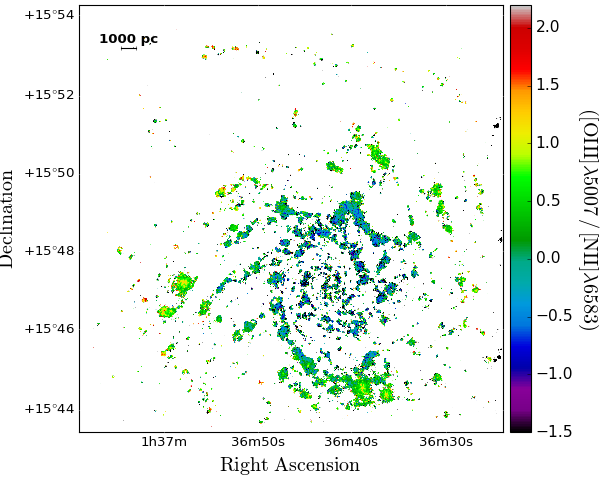

In [44]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0],pad=0.01)
cbar.set_label('$\mathrm{([OIII]\lambda5007\,/\,[NII]\lambda6583)}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(-1.5,2.2)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2, fontsize=12)
plt.yticks(yyyyy2,yyyy2, fontsize=12)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [45]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_OIII_NII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)

In [46]:
# Read Fits Data and Data Header

ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()

ahdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits')
ahdu_list2.info()
aimage_data2 = ahdu_list2[0].data
ahdu_list2.close()

ahdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits')
ahdu_list3.info()
aimage_data3 = ahdu_list3[0].data
ahdu_list3.close()

fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_data1 = fhdu_list1[0].data
fhdu_list1.close()

fhdu_list2 = fits.open('NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits')
fhdu_list2.info()
fimage_data2 = fhdu_list2[0].data
fhdu_list2.close()

fhdu_list3 = fits.open('NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits')
fhdu_list3.info()
fimage_data3 = fhdu_list3[0].data
fhdu_list3.close()
                       
    
sn1 = fits.getdata('NGC628_SN3_1.0.LineMaps.map.6731.snr.clean.fits')
sn2 = fits.getdata('NGC628_SN3_1.0.LineMaps.map.6716.snr.clean.fits')

#hdu_list = fits.open('NII_Ha_cut.fits')
#hdu_list.info()

#image_data = hdu_list[0].data
#hdu_list.close()
#image_data = np.log10(image_data)
#image_data[np.where(np.isfinite(image_data) == False)] = 0

s = fits.open('stars.fits')
s.info()
image_s = s[0].data
s.close()
aimage_data2[np.where(aimage_data2 < 0)] = 0
aimage_data3[np.where(aimage_data3 < 0)] = 0
fimage_data2[np.where(aimage_data2 < 0)] = 0
fimage_data3[np.where(aimage_data3 < 0)] = 0
                       
image_data = (aimage_data2*fimage_data2)/(aimage_data3*fimage_data3)
image_data[(aimage_data2 >= 1.e-18) & (aimage_data3 == 0)] = 1.8
image_data[(aimage_data3 >= 1.e-18) & (aimage_data2 == 0)] = 0.6

#image_data = np.log10(image_data)
image_data[np.where(image_data > 1.8)] = 1.8
image_data[(aimage_data2 <= 0.6e-18)] = 10000
image_data[(aimage_data3 <= 0.6e-18)] = 10000
image_data[np.where(aimage_data1 < 1.2e-18)] = 10000
image_data[np.where(sn1 < 6)] = 10000
image_data[np.where(sn2 < 6)] = 10000
#image_data[np.where(np.isfinite(image_data) == False)] = 4
image_data[np.where(image_s == 1)] = 10000

Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6716.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6731.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6716.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6731.fwhm.clean.fits
No.    Name         T

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:49: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:50: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:52: RuntimeWarning: invalid value encountered in less
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in multiply
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: divide by zero encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:54: RuntimeWarning: invalid value encountered in divide
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in greater_equal
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:56: Runtim

<IPython.core.display.Javascript object>


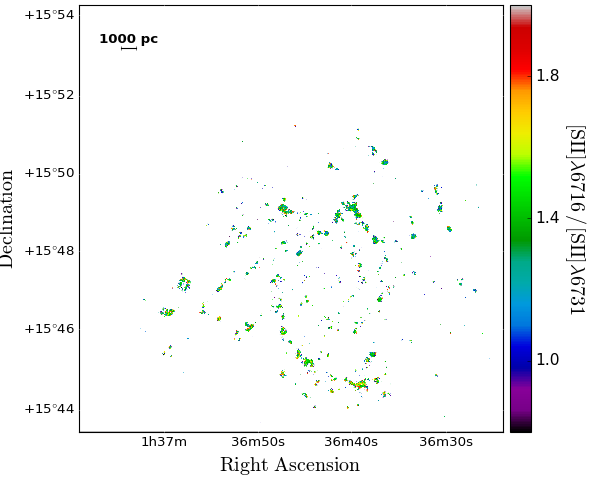

In [68]:
# Plot the Data 
%matplotlib nbagg


fig = plt.figure(figsize=(7.7,6))
cs = plt.imshow(image_data, cmap='spectral')
cs.cmap.set_over('w')
cs.cmap.set_under('k')

# Plot the Color Scale
cbar=plt.colorbar(ticks=[1.0,1.4,1.8],pad=0.01)
cbar.set_label('$\mathrm{[SII]\lambda6716\,/\,[SII]\lambda6731\,}$', rotation=270, fontsize=18, labelpad=25)
plt.clim(0.8,2)
cbar.ax.tick_params(labelsize=14)


# Define the Data Plot Area
xlow = 0
xmax = 2048
ylow = 0
ymax = 2064

#1
#xlow = 362
#xmax = 590
#ylow = 550
#ymax = 785
##2
#xlow = 862
#xmax = 1090
#ylow = 840
#ymax = 1075
##3
#xlow = 1122
#xmax = 1350
#ylow = 865
#ymax = 1100
#4
#xlow = 1182
#xmax = 1410
#ylow = 574
#ymax = 810

plt.xlim(xlow,xmax)
plt.ylim(ylow,ymax)

# Define the Scale of that_amount_of_pc Line Position
that_amount_of_pc = 1000
pc = str(that_amount_of_pc)+' pc' 
xlinelow = xlow + (xmax - xlow) * 0.1
xlinemax = xlow + (xmax - xlow) * 0.1 + 7.07/100 * that_amount_of_pc 
ylinelow = ylow + (ymax - ylow) * 0.9
ylinemax = ylow + (ymax - ylow) * 0.9

# Plot the Scale of that_amount_of_pc Line Position
plt.plot([xlinelow, xlinemax], [ylinelow, ylinemax], color='k', linewidth=1, marker = '|', markersize=3)
plt.annotate(pc, xy = [(xlinemax + xlinelow)/2, (ylinemax + ylinelow)/2 + 0.01*(ylinemax + ylinelow)], \
             ha = 'center', va = 'center', fontsize = 12, fontname = 'Times', color = 'k',fontweight='bold')

# Plot the Predefined Ticks

test = np.array(xxxx)
xxxxx2=[X for X in list(xxxxx) if (X >= xlow and X <= xmax)]
xxxx2=test[np.where(xxxxx == xxxxx2)]
    
test = np.array(yyyy)
yyyyy2=[Y for Y in list(yyyyy) if (Y >= ylow and Y <= ymax)]
yyyy2=test[np.where(yyyyy == yyyyy2)]

plt.xticks(xxxxx2,xxxx2, fontsize=12)
plt.yticks(yyyyy2,yyyy2, fontsize=12)
plt.tick_params(color='w', length=5)

# Plot the Ha Peaks Positions 
#plt.plot(regx, regy, '+k', markersize=5)

# Modification of the Plot area and the Axis Labels
plt.xlabel('$\mathrm{Right\,\,Ascension}$', fontsize=18, fontname='Helvetica')
plt.ylabel('$\mathrm{Declination}$', fontsize=18, fontname='Helvetica')
plt.subplots_adjust(top=0.99)
plt.subplots_adjust(bottom=0.1)
plt.subplots_adjust(left=-0.15)
plt.subplots_adjust(right=1.00)

In [69]:
#Save the Plot in a .eps or .png file
plt.savefig('NGC628_SII_SII.eps', transparent=True, bbox_inches='tight', pad_inches=0.04)
#plt.savefig('test.png', dpi=1000)